<a href="https://colab.research.google.com/github/Rishitha110506/Machine-Learning/blob/main/ML_Lab_4_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MACHINE LEARNING ASSIGNMENT - 04

NAME : KAMPALLI RISHITHA

REG NO : BL.SC.U4AIE24020

SEC : D.sec

fetching data


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_excel("BERT_Embeddings.xlsx")  # Ensure the file is in your working directory

# Step 2: Extract features and labels
X = df.iloc[:, 0:768].values  # Assuming first 768 columns are BERT features
y = df['label'].values        # Assuming 'label' is the target column

# Step 3: Filter for binary classification (e.g., class 1 and 2)
mask = (y == 1) | (y == 2)
X_filtered = X[mask]
y_filtered = y[mask]

# Step 4: Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Step 5: Train initial kNN model (k=3)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

print("Dataset loaded and model trained with k = 3.")


Dataset loaded and model trained with k = 3.


 (A1)

This code evaluates the kNN classifier using confusion matrix and classification report. It helps determine whether the model is underfitting, overfitting, or generalizing well by comparing training and test performance.


In [ ]:
#Import functions

from sklearn.metrics import confusion_matrix, classification_report

# Function to evaluate confusion matrix and classification metrics

def evaluate_model(model, X, y, label): #defining function that takes model,data(X),true labels(y) and label string identification
    y_pred = model.predict(X)  # Predict labels
    cm = confusion_matrix(y, y_pred)  # Confusion matrix
    report = classification_report(y, y_pred, output_dict=True)  #generate classification report
    print(f"\n--- {label} ---")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:")
    for cls in ['1', '2']: #iterating over 2 classes
        print(f"Class {cls} - Precision: {report[cls]['precision']:.2f}, Recall: {report[cls]['recall']:.2f}, F1-Score: {report[cls]['f1-score']:.2f}")
    print(f"Overall Accuracy: {report['accuracy']:.2f}")
    return report['accuracy']

# Evaluate on training and test sets
train_acc = evaluate_model(model, X_train, y_train, "Training Set")#calling function on training data
test_acc = evaluate_model(model, X_test, y_test, "Test Set")#calling function on testing data

# Inference based on accuracy gap
print("\n--- Model Fit Inference ---")
if train_acc - test_acc > 0.15:
    print("The model is likely OVERFITTING: high training accuracy but significantly lower test accuracy.")
elif test_acc < 0.6:
    print("The model is likely UNDERFITTING: low accuracy on both training and test sets.")
else:
    print("The model shows a REGULAR FIT: training and test accuracies are close and reasonably high.")




--- Training Set ---
Confusion Matrix:
 [[150 164]
 [ 38 756]]

Classification Report:
Class 1 - Precision: 0.80, Recall: 0.48, F1-Score: 0.60
Class 2 - Precision: 0.82, Recall: 0.95, F1-Score: 0.88
Overall Accuracy: 0.82

--- Test Set ---
Confusion Matrix:
 [[ 36 102]
 [ 26 311]]

Classification Report:
Class 1 - Precision: 0.58, Recall: 0.26, F1-Score: 0.36
Class 2 - Precision: 0.75, Recall: 0.92, F1-Score: 0.83
Overall Accuracy: 0.73

--- Model Fit Inference ---
The model shows a REGULAR FIT: training and test accuracies are close and reasonably high.


(A2)

This function calculates key regression metrics to assess prediction accuracy.

In [ ]:
##importing regression evaluation metrics and numpy library

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Function to compute and print regression metrics

def regression_metrics(y_true, y_pred): #defining function that takes true values(Y) and predicted values(X)
    mse = mean_squared_error(y_true, y_pred)  # Mean Squared Error (avg of squared differences between true and predicted values)
    rmse = np.sqrt(mse)  # Root Mean Squared Error (square root of MSE)
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Mean Absolute Percentage Error (avg percentage between true and predicted values )
    r2 = r2_score(y_true, y_pred)  # R² Score (coefficient of determination)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R² Score: {r2:.4f}")

# Example usage with samaple data (replace with  actual regression outputs)
y_true = np.array([100, 150, 200, 250, 300])
y_pred = np.array([110, 140, 195, 260, 290])

# Calling the function to print metrics
regression_metrics(y_true, y_pred)

MSE: 85.0000
RMSE: 9.2195
MAPE: 0.0530
R² Score: 0.9830


(A3)

This code creates 20 random 2D points and assigns them to two classes. The scatter plot helps visualize class separation in feature space.

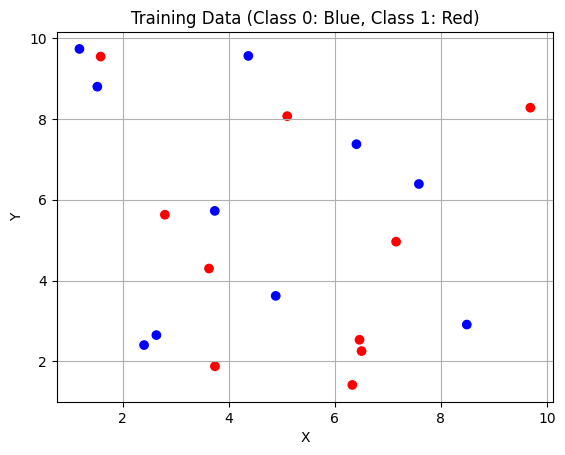

In [ ]:
##importing numpy library and matplotlib's pyplot module for plotting
import numpy as np
import matplotlib.pyplot as plt

# Generating 20 training points with 2 features
def generate_training_data(): ##defining function to create synthetic training data
    np.random.seed(42) ##setting random seed for reproducibility
    X = np.random.uniform(1, 10, (20, 2))  ## generating Random values between 1 and 10
    y = np.array([0]*10 + [1]*10)  # create labels (first 10 from class'0' and otehr 10 from class '1')
    return X, y #returning generated features

# Plot training data with class colors
def plot_training_data(X, y): #defining function
    colors = ['blue' if label == 0 else 'red' for label in y] #assigning colors
    plt.scatter(X[:, 0], X[:, 1], c=colors) #creatw scatter plot of 2 features
    plt.title("Training Data (Class 0: Blue, Class 1: Red)") #add title to plot
    plt.xlabel("X") #label x axis
    plt.ylabel("Y") # label y axis
    plt.grid(True) #display grid for better readability
    plt.show() #display the plot

# Run A3
X_train_2d, y_train_2d = generate_training_data()
plot_training_data(X_train_2d, y_train_2d)

(A4)

This code classifies 10,000 test points using kNN and visualizes the predicted class boundaries. It shows how the model generalizes from training data.

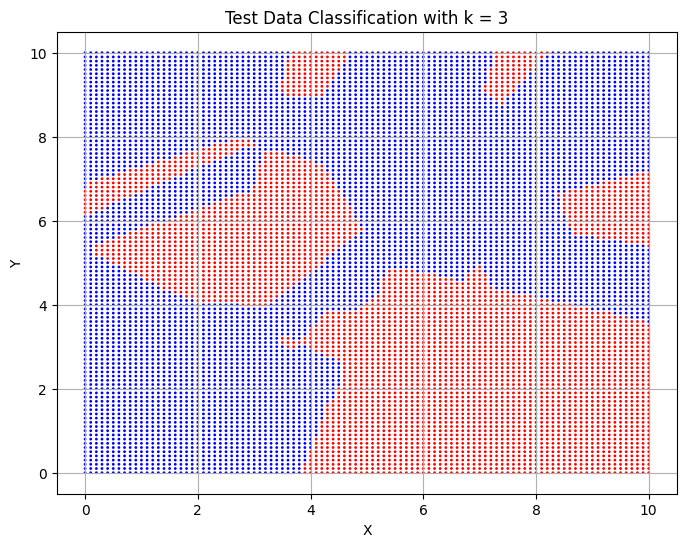

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Generate test grid of 10,000 points
def generate_test_grid(): #defining function to create grid of test points
    x_vals = np.arange(0, 10.1, 0.1) #generating x axis values
    y_vals = np.arange(0, 10.1, 0.1) #generating y axis values
    xx, yy = np.meshgrid(x_vals, y_vals) #creating 2D grid coordinates from x_vals and y_vals
    test_points = np.c_[xx.ravel(), yy.ravel()]  # Combine into 2D points
    return test_points #return generated points

# Classify and plot test points
def classify_and_plot(X_train, y_train, test_points, k=3):#defining function to classify test pointsusing KNN
    knn = KNeighborsClassifier(n_neighbors=k) #initialise K-NN classifier with k neighbors
    knn.fit(X_train, y_train)  # Train K-NN model using training data
    predictions = knn.predict(test_points)  # Predict class labels for all test points
    colors = ['blue' if label == 0 else 'red' for label in predictions] #assingning colors based on predicted class
    plt.figure(figsize=(8, 6)) #create new plot with specified figure size
    plt.scatter(test_points[:, 0], test_points[:, 1], c=colors, s=1) #sctter plot of test points
    plt.title(f"Test Data Classification with k = {k}") #add title
    plt.xlabel("X") #label X axis
    plt.ylabel("Y") #label Y axis
    plt.grid(True) #display grid for better readability
    plt.show() #display the plot

# Run A4
test_points = generate_test_grid()
classify_and_plot(X_train_2d, y_train_2d, test_points, k=3)

(A5)

This loop repeats classification for different values of
𝑘
, helping you observe how decision boundaries change. Lower
𝑘
 leads to sharper boundaries; higher
𝑘
 smooths them.

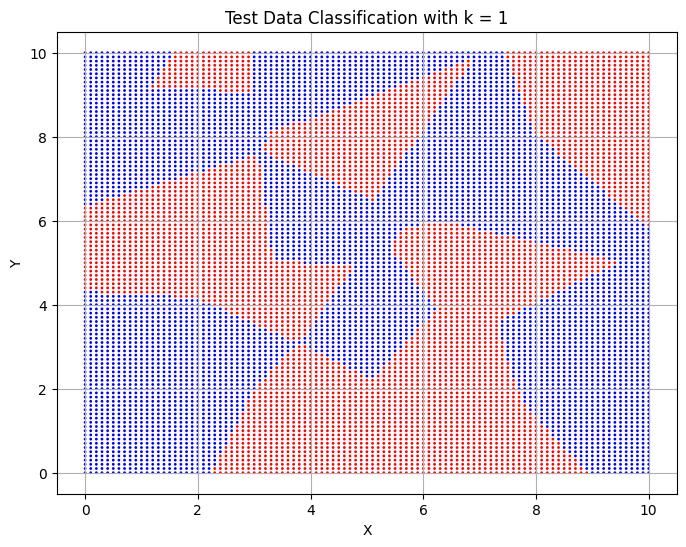

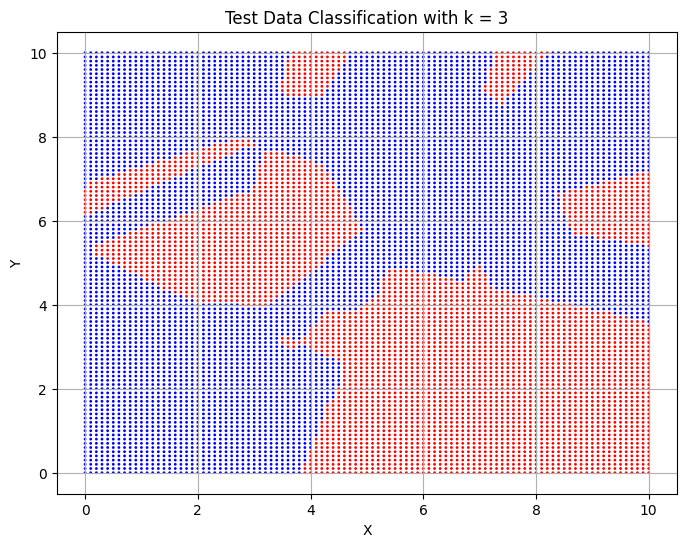

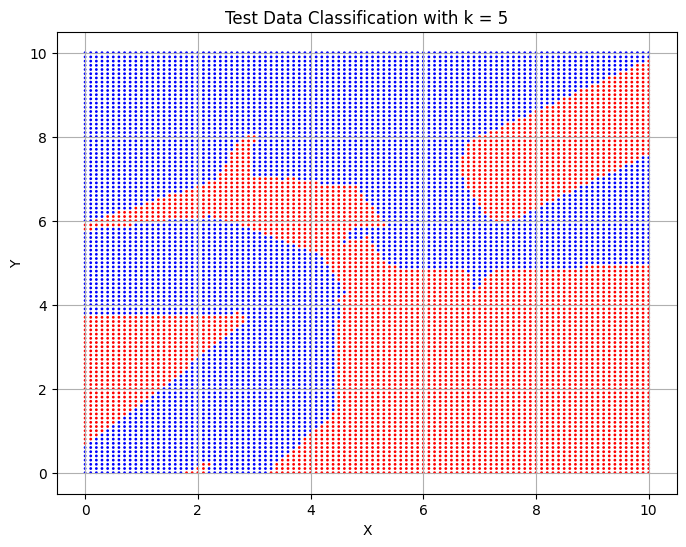

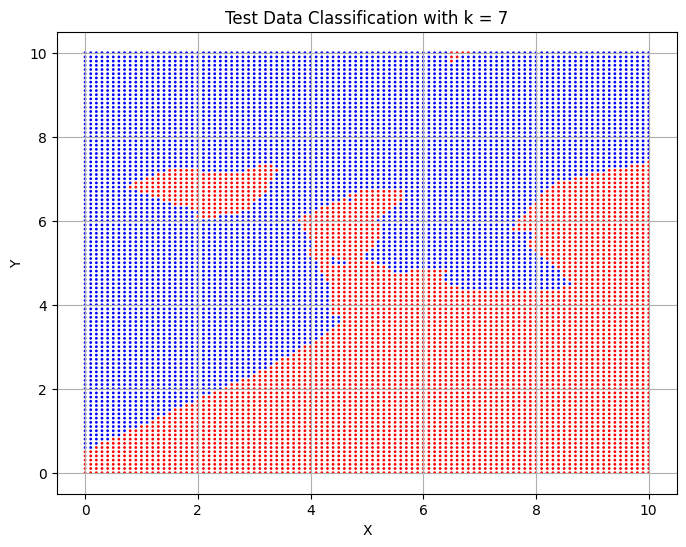

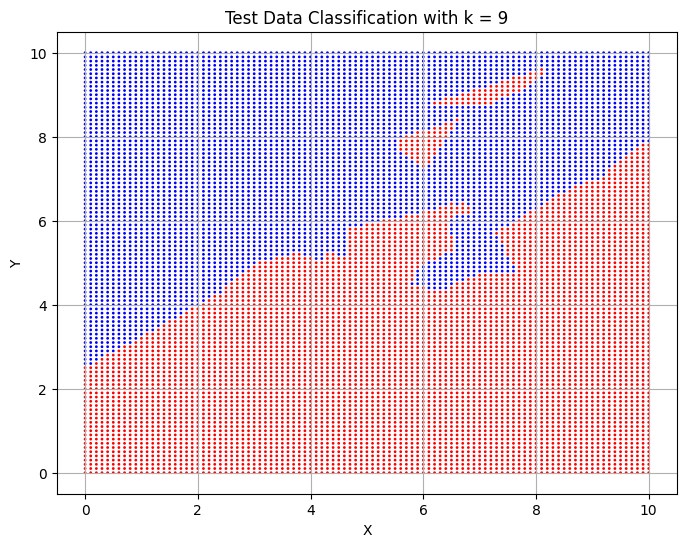

In [ ]:
# Loop through multiple k values and plot results
def plot_for_multiple_k(X_train, y_train, test_points, k_values): #defining function that takes training data
    for k in k_values: #iterate through each value of k
        classify_and_plot(X_train, y_train, test_points, k) #call classify and plot function.This trains model eith that k, classifies the test points and plot classification results


# Run A5
plot_for_multiple_k(X_train_2d, y_train_2d, test_points, k_values=[1, 3, 5, 7, 9])


(A6)

This code applies the same classification and visualization logic to your actual project data using two selected features and two classes.

In [ ]:
# Select two features and two classes from project data
#defining function to filter dataset by chosen features and 2 class labels
def select_features_and_classes(X, y, feature_indices=(0, 1), class_labels=(1, 2)):
    mask = (y == class_labels[0]) | (y == class_labels[1]) #create boolean mask to keep only rows where target label matches one of 2 choosen classes
    X_selected = X[mask][:, list(feature_indices)] #apply mask to feature matrix X, then select only specified feature indices
    y_selected = y[mask] #apply mask to labels to keep only chosen classes
    return X_selected, y_selected #return filtered features and labels

# Apply A3–A5 logic to project data
#call selection function on project datasetto get filtered fearures and labels
X_proj, y_proj = select_features_and_classes(X, y, feature_indices=(0, 1), class_labels=(1, 2))
#split filtered dataset into training and test sets
X_train_proj, X_test_proj, y_train_proj, y_test_proj = train_test_split(X_proj, y_proj, test_size=0.3, random_state=42)

model_proj = KNeighborsClassifier(n_neighbors=3) #initialize K-NN classifier wit k=3 neighbors
model_proj.fit(X_train_proj, y_train_proj) #train the model using training data
evaluate_model(model_proj, X_test_proj, y_test_proj, "Project Test Set") #evaluate trained model on test set and print metrics



--- Project Test Set ---
Confusion Matrix:
 [[ 37 101]
 [ 64 273]]

Classification Report:
Class 1 - Precision: 0.37, Recall: 0.27, F1-Score: 0.31
Class 2 - Precision: 0.73, Recall: 0.81, F1-Score: 0.77
Overall Accuracy: 0.65


0.6526315789473685

(A7)

We use GridSearchCV to test all values of k in a range and RandomizedSearchCV to try random k values from a wider range. Both methods use cross-validation to find the best k that gives the highest accuracy. This helps us choose the most effective kNN model for our dataset.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving BERT_Embeddings.xlsx to BERT_Embeddings.xlsx


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import pandas as pd
import numpy as np

# Load and filter project data for two selected features and two classes
def load_project_data(filepath, feature_indices=(0, 1), class_labels=(1, 2)):
    df = pd.read_excel(filepath)
    X = df.iloc[:, list(feature_indices)].values
    y = df['label'].values
    mask = (y == class_labels[0]) | (y == class_labels[1])
    return X[mask], y[mask]

# Function to perform Grid Search
def perform_grid_search(X_train, y_train):
    param_grid = {'n_neighbors': list(range(1, 21))}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_neighbors'], grid_search.best_score_

# Function to perform Random Search
def perform_random_search(X_train, y_train):
    param_dist = {'n_neighbors': list(range(1, 51))}
    random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist,
                                       n_iter=10, cv=5, random_state=42)
    random_search.fit(X_train, y_train)
    return random_search.best_params_['n_neighbors'], random_search.best_score_

# Load and prepare data
X, y = load_project_data("BERT_Embeddings.xlsx", feature_indices=(0, 1), class_labels=(1, 2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Run both searches
best_k_grid, best_score_grid = perform_grid_search(X_train, y_train)
best_k_random, best_score_random = perform_random_search(X_train, y_train)

# Display results
print("GridSearchCV Results:")
print("Best k:", best_k_grid)
print("Best cross-validated accuracy:", round(best_score_grid * 100, 2), "%")

print("\n RandomizedSearchCV Results:")
print("Best k:", best_k_random)
print("Best cross-validated accuracy:", round(best_score_random * 100, 2), "%")

🔵 GridSearchCV Results:
Best k: 20
Best cross-validated accuracy: 71.03 %

🎲 RandomizedSearchCV Results:
Best k: 49
Best cross-validated accuracy: 71.66 %
